1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


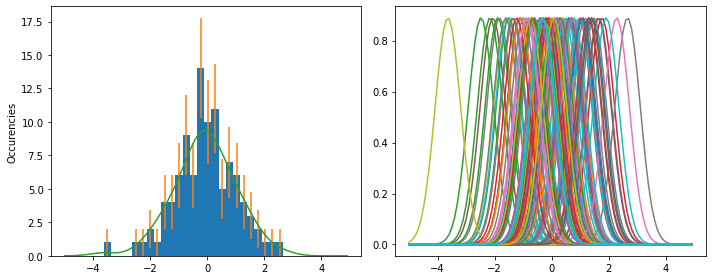

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

np.random.seed(12343)

sigma, mean, N = 1, 0, 100

nbins = 25

x = sigma*np.random.randn(N) + mean

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1.hist(x, bins=nbins)
ax1.set_ylabel('Occurencies')

hist, edges =  np.histogram(x, bins = nbins)

halfway = [(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)]
ax1.errorbar(halfway, hist, hist**(1/2), fmt = 'none')

#gaussians = np.array([(1.06*x.std()*x.size**(-1/5))*np.random.rand(N)+y for y in x])
gaussians = np.array([stats.norm(y, 1.06*x.std()*x.size**(-1/5)) for y in x])

x_values = np.arange(-5, 5, 0.1)

for i in range(gaussians.size):
    ax2.plot(x_values, gaussians[i].pdf(x_values))
    
gaussians2 = pd.DataFrame([np.array(gaussians[i].pdf(x_values)) for i in range(gaussians.size)])
gaussians_sum = gaussians2.sum(axis=0)
normalizator = sp.integrate.trapz(gaussians_sum, x_values) 
normhist = sp.integrate.trapz(hist, halfway)
gaussians_sum /= normalizator

ax1.plot(x_values, gaussians_sum*normhist)

fig.tight_layout()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

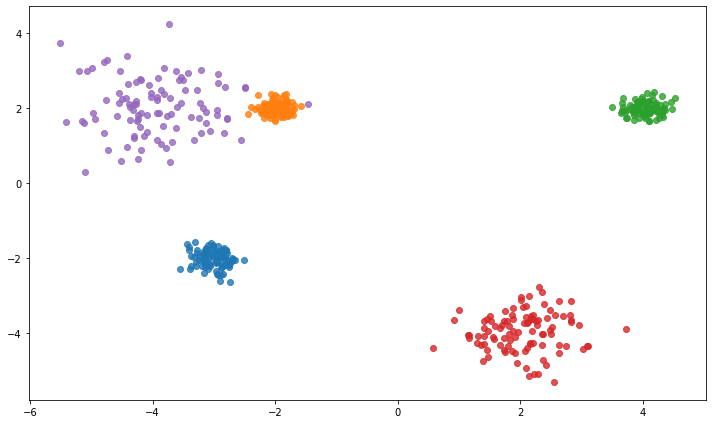

In [71]:
values = np.arange(-5, 5, 0.1)
N=5
N_point = 100

def create_2D_gaussian_dataframe(meanx, meany, std):
    x = np.random.randn(N_point)*std + meanx
    y = np.random.randn(N_point)*std + meany

    return x,y


fig, ax1 = plt.subplots(figsize=(10, 6))
    
for i in range(N):
    
    gauss_x, gauss_y = create_2D_gaussian_dataframe(np.random.randint(-5,high=5), np.random.randint(-5,high=5), np.random.rand(1))

    ax1.scatter(gauss_x, gauss_y, alpha = 0.8)



fig.tight_layout()

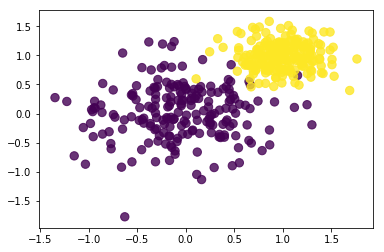

In [72]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

<ErrorbarContainer object of 3 artists>

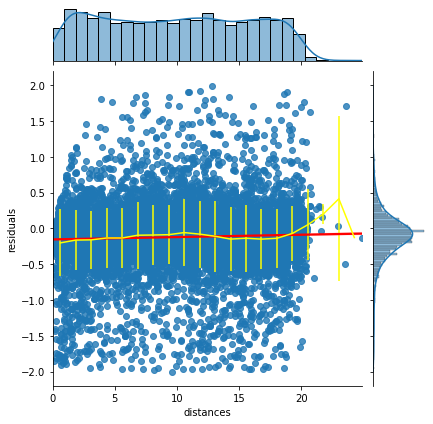

In [75]:
# !wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy 

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

data = pd.DataFrame(np.load('residuals_261.npy').item())
data_filtered = data[abs(data['residuals']) < 2]

linearRegression = stats.linregress(data['residuals'], data['distances'])

g = sns.jointplot(x="distances", y="residuals", data=data_filtered, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})

nbin = 20

hist, edges =  np.histogram(data['distances'], bins = nbin)
x = np.array([(edges[i]+edges[i+1])/2 for i in range(len(edges)-1)])

y = data_filtered.groupby(pd.cut(data_filtered['distances'], bins=nbin)).mean().unstack('distances')['residuals']

erry = data_filtered.groupby(pd.cut(data_filtered['distances'], bins=nbin)).std().unstack('distances')['residuals']

plt.errorbar(x,y,erry, color='yellow')
